# PROJET STATISTIQUE

* ## Installation et chargement des packages necessaires

In [82]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [83]:
# CHARGEMENTS DES PACKAGES NECESSAIRES
import pandas as pd
from collections import Counter # va permettre de calculer les mots frequents
from wordcloud import WordCloud # va permettre de faire un nuage de mots pour faire ressortir les mots les plus frequents
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

* ## IMPORTATION DES DONNEES

In [84]:
data = pd.read_excel("makeorg_sport.xlsx")
data_insee = pd.read_excel("Pyra2024.xlsx", sheet_name="2024 - France", skiprows=4)
data_insee = data_insee.drop([0,1,2,3,4]).reset_index(drop=True)

##  STATISTIQUES DESCRIPTIVES

In [85]:
print(data_insee)

       Unnamed: 0   Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4
0            2019            4     374866     355663     730529
1            2018            5     380519     362356     742875
2            2017            6     389513     371940     761453
3            2016            7     401603     381552     783155
4            2015            8     411899     392004     803903
..            ...          ...        ...        ...        ...
93           1926           97       7851      31067      38918
94           1925           98       4959      21990      26949
95           1924           99       3112      14684      17796
96  1923 ou avant  100 ou plus       4647      26997      31644
97          Total          NaN   33117745   35255688   68373433

[98 rows x 5 columns]


In [86]:
print(data.describe())

               √Çge  D√©partement  Nb de votes   Zone score       % pour  \
count  1516.000000   999.000000  1909.000000  1909.000000  1909.000000   
mean     50.662929    69.575576   166.039811     0.585409     0.621671   
std      13.770077   125.411204   142.210545     0.294581     0.159325   
min      12.000000     1.000000    16.000000     0.040000     0.054000   
25%      40.000000    32.000000    96.000000     0.291000     0.526000   
50%      51.000000    59.000000    97.000000     0.643000     0.646000   
75%      61.000000    76.000000   202.000000     0.822000     0.742000   
max      87.000000   974.000000  1584.000000     1.150000     0.937000   

          % contre     % neutre  
count  1909.000000  1909.000000  
mean      0.168306     0.209935  
std       0.110576     0.092298  
min       0.012000     0.020000  
25%       0.090000     0.148000  
50%       0.142000     0.194000  
75%       0.220000     0.260000  
max       0.816000     0.815000  


In [87]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909 entries, 0 to 1908
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Proposition      1909 non-null   object 
 1   Nom d'auteur     1909 non-null   object 
 2   √Çge              1516 non-null   float64
 3   D√©partement      999 non-null    float64
 4   Zone d'adh√©sion  1909 non-null   object 
 5   Nb de votes      1909 non-null   int64  
 6   Zone score       1909 non-null   float64
 7   % pour           1909 non-null   float64
 8   % contre         1909 non-null   float64
 9   % neutre         1909 non-null   float64
 10  Id               1909 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 164.2+ KB
None


* Nombre de mots par propositions

In [88]:
nb_mots = [len(proposition.split()) for proposition in data["Proposition"]]

# Cr√©er un DataFrame
df = pd.Series(nb_mots)
data['nb_de_mots'] = df 
# Afficher le r√©sultat dans un format similaire
print(data['nb_de_mots'])

0       21
1       20
2       28
3       26
4       23
        ..
1904    17
1905    19
1906    19
1907    21
1908    15
Name: nb_de_mots, Length: 1909, dtype: int64


* # Analyse des donn√©es manquantes

In [89]:
# Visualisation des donn√©es manquantes
missing_values = data.isnull().sum()
print(missing_values)


Proposition          0
Nom d'auteur         0
√Çge                393
D√©partement        910
Zone d'adh√©sion      0
Nb de votes          0
Zone score           0
% pour               0
% contre             0
% neutre             0
Id                   0
nb_de_mots           0
dtype: int64


In [90]:
# Proportion des donn√©es manquantes par colonne
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

Proposition         0.000000
Nom d'auteur        0.000000
√Çge                20.586695
D√©partement        47.668937
Zone d'adh√©sion     0.000000
Nb de votes         0.000000
Zone score          0.000000
% pour              0.000000
% contre            0.000000
% neutre            0.000000
Id                  0.000000
nb_de_mots          0.000000
dtype: float64


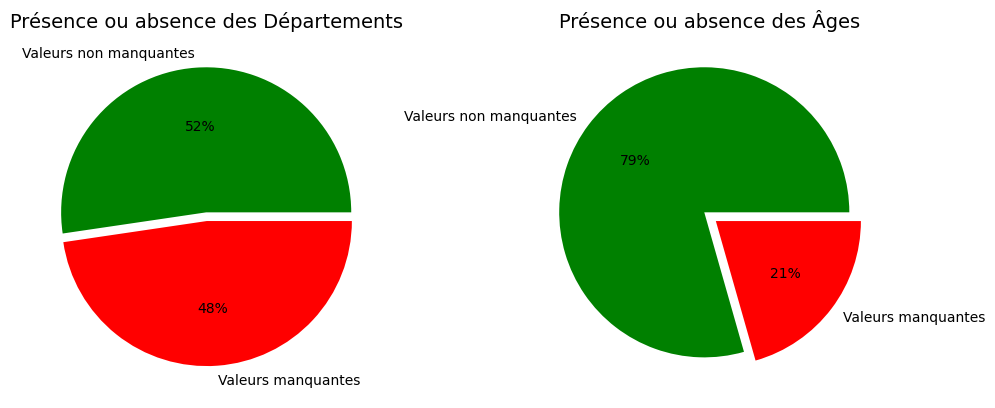

In [91]:
# Cr√©ation de la figure avec deux sous-graphiques c√¥te √† c√¥te
# Configuration des graphiques
fig, axes = plt.subplots(1, 2, figsize=(10, 12))  # 2 lignes, 1 colonne, taille personnalis√©e

# Donn√©es et param√®tres pour le premier graphique
colors = ["green", "red"]
labels = ["Valeurs non manquantes", "Valeurs manquantes"]
explode = [0.03, 0.03]
bdd = data['D√©partement'].notnull().value_counts()

# Premier graphique (Pr√©sence ou absence des D√©partements)
axes[0].pie(
    bdd, labels=labels, autopct="%0.0f%%", explode=explode,
    textprops={"color": '#000000'}, colors=colors
)
axes[0].set_title("Pr√©sence ou absence des D√©partements", fontsize=14)

# Donn√©es et param√®tres pour le deuxi√®me graphique
explode = [0.05, 0.05]
bdd1 = data['√Çge'].notnull().value_counts()

# Deuxi√®me graphique (Pr√©sence ou absence des √Çges)
axes[1].pie(
    bdd1, labels=labels, autopct="%0.0f%%", explode=explode,
    textprops={"color": '#000000'}, colors=colors
)
axes[1].set_title("Pr√©sence ou absence des √Çges", fontsize=14)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


* ## VISUALISATION GRAPHIQUE DES DONNEES

C:\Users\USER\AppData\Local\Temp\ipykernel_18376\1619150217.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.cut(data['√Çge'], bins=bins, labels=labels, include_lowest=True), palette='viridis', stat = 'count')


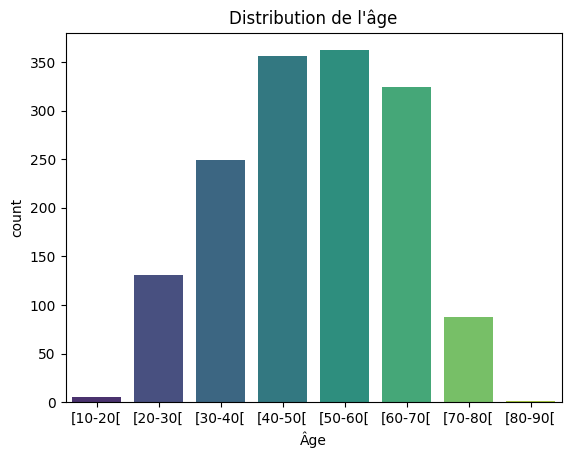

In [92]:
bins = [10,20,30,40,50,60,70,80,90]  # Limites des intervalles
labels = ['[10-20[', '[20-30[', '[30-40[', '[40-50[', '[50-60[', '[60-70[', '[70-80[','[80-90[']

# Utiliser pd.cut directement dans le graphique
sns.countplot(x=pd.cut(data['√Çge'], bins=bins, labels=labels, include_lowest=True), palette='viridis', stat = 'count')
plt.title('Distribution de l\'√¢ge')
plt.show()

In [93]:
#Pour tracer le graphe
df_france = data_insee

df_france.columns = ["Ann√©e de naissance", "√Çge r√©volu", "Nombre d'hommes", "Nombre de femmes", "Ensemble"]

df_france = df_france.dropna(subset=["√Çge r√©volu", "Ensemble"])

df_france = df_france[df_france["√Çge r√©volu"] != "√Çge r√©volu"]

df_france["√Çge r√©volu"] = pd.to_numeric(df_france["√Çge r√©volu"], errors='coerce')

df_france["Ensemble"] = pd.to_numeric(df_france["Ensemble"], errors='coerce')
df_filtered = df_france[(df_france["√Çge r√©volu"] >= 12) ]



C:\Users\USER\AppData\Local\Temp\ipykernel_18376\2334734589.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Cat√©gories"] = pd.cut(df_filtered["√Çge r√©volu"], bins=bins, labels=labels, include_lowest=False)
C:\Users\USER\AppData\Local\Temp\ipykernel_18376\2334734589.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x=df_filtered["Cat√©gories"],palette='viridis',order=labels,stat='count')


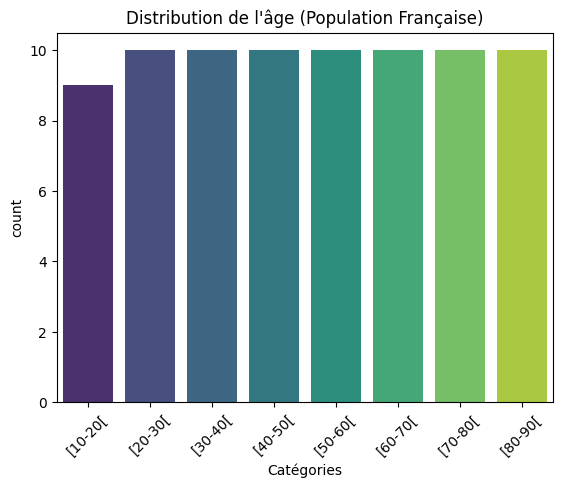

In [94]:
# D√©finir les intervalles et les labels

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]

labels = ['[10-20[', '[20-30[', '[30-40[', '[40-50[', '[50-60[', '[60-70[', '[70-80[', '[80-90[']
# Ajouter une colonne de cat√©gories d'√¢ge
df_filtered["Cat√©gories"] = pd.cut(df_filtered["√Çge r√©volu"], bins=bins, labels=labels, include_lowest=False)

# Tracer le graphique de proportion

sns.countplot( x=df_filtered["Cat√©gories"],palette='viridis',order=labels,stat='count')

plt.title("Distribution de l'√¢ge (Population Fran√ßaise)")

plt.xticks(rotation=45)

plt.show()


In [95]:
#test de khi 2


from scipy.stats import chisquare

df_filtered["Cat√©gories"] = pd.cut(df_filtered["√Çge r√©volu"], bins=bins, labels=labels, include_lowest=False)

france_counts = df_filtered["Cat√©gories"].value_counts().reindex(labels, fill_value=0)

france_proportions = france_counts / france_counts.sum()  # Proportions normalis√©es


# √âchantillon : calcul des proportions pour chaque cat√©gorie

sample_counts = pd.cut(data['√Çge'], bins=bins, labels=labels, include_lowest=False).value_counts().reindex(labels, fill_value=0)

sample_proportions = sample_counts / sample_counts.sum()  # Proportions normalis√©es

# Test du chi¬≤

chi2_stat, p_value = chisquare(f_obs=sample_proportions, f_exp=france_proportions)

 

# R√©sultats

chi2_stat, p_value

C:\Users\USER\AppData\Local\Temp\ipykernel_18376\3427124036.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Cat√©gories"] = pd.cut(df_filtered["√Çge r√©volu"], bins=bins, labels=labels, include_lowest=False)


(0.5457621537567809, 0.9992610691973189)

In [96]:
#test de permutation sur les proportions 
n=1000
permutation_diffs = []

combined = np.concatenate([sample_proportions.values, france_proportions.values])
n_observed = len(sample_proportions)

for _ in range(n):
    np.random.shuffle(combined)
    new_observed = combined[:n_observed]
    new_expected = combined[n_observed:]
    permutation_diffs.append(np.sum(np.abs(new_observed - new_expected)))
# Calcul de la p-valeur du test de permutation
observed_difference = np.sum(np.abs(sample_proportions.values - france_proportions.values))
p_value_permutation = np.mean(np.array(permutation_diffs) >= observed_difference)

# R√©sultats
chi2_stat, p_value, p_value_permutation

(0.5457621537567809, 0.9992610691973189, 0.385)

In [ ]:
from scipy.stats import fisher_exact
#H0(hypoth√®se nulle) : Les distributions d‚Äô√¢ges de l‚Äô√©chantillon et de la population fran√ßaise sont similaires.
france_counts_final = df_filtered.groupby("Cat√©gories", observed=False)["Ensemble"].sum().reindex(labels, fill_value=0)

p_values_fisher = []

for i in range(len(labels)):
    table_2x2 = np.array([
        [sample_counts.iloc[i],france_counts_final.iloc[i]],
        [france_counts_final.iloc[i], sample_counts.iloc[i]]
    ])

    _, p_value = fisher_exact(table_2x2)  # Ex√©cution du test exact de Fisher
    p_values_fisher.append(p_value)

# Cr√©ation du tableau des r√©sultats
df_fisher_results = pd.DataFrame({
    "Cat√©gorie d'√¢ge": labels,
    "Effectif √âchantillon": sample_counts.values,
    "Effectif INSEE": france_counts_final.values,
    "P-valeur Fisher": p_values_fisher
})

# Affichage des r√©sultats sous forme de tableau
print(df_fisher_results.to_string(index=False))


Cat√©gorie d'√¢ge  Effectif √âchantillon  Effectif INSEE  P-valeur Fisher
        [10-20[                     5         7667656              0.0
        [20-30[                   131         7707946              0.0
        [30-40[                   249         8346223              0.0
        [40-50[                   356         8547545              0.0
        [50-60[                   362         8945233              0.0
        [60-70[                   324         8051783              0.0
        [70-80[                    88         6340610              0.0
        [80-90[                     1         2946512              0.0


In [98]:


# #Zoom sur le graphe de distribution des votes

 

# Identifier l'index de la barre la plus longue

# max_count_index = np.argmax(counts)

# max_bin_start = bin_edges[max_count_index]

# max_bin_end = bin_edges[max_count_index + 1]

# filtered_values = values[(values >= max_bin_start) & (values < max_bin_end)]

 

# Recalculer un histogramme avec des bins plus fins sur cette plage

# fine_bins = 10 

# fine_counts, fine_bin_edges = np.histogram(filtered_values, bins=fine_bins)

 

# plt.figure(figsize=(8, 5))

# plt.bar(fine_bin_edges[:-1], fine_counts, width=np.diff(fine_bin_edges), edgecolor='black', align='edge', color='orange')

# plt.xlim(max_bin_start, max_bin_end) 

# plt.ylim(0, fine_counts.max() * 1.1) 

# plt.title("Zoom sur la barre la plus longue")

# plt.xlabel("Nombre de votes")

# plt.ylabel("Fr√©quence")

# plt.grid(axis='y', linestyle='--', alpha=0.7)

# plt.show()

In [99]:
# S√©lectionner les colonnes pertinentes : '√Çge r√©volu' et 'Ensemble' (Total)
df_insee_clean = data_insee[['Unnamed: 1', 'Unnamed: 4']]

# Nettoyer les donn√©es (enlever les lignes inutiles comme 'Total')
df_insee_clean = df_insee_clean.dropna()
import pandas as pd

# Convertir les √¢ges et les nombres en types num√©riques
df_insee_clean['√Çge r√©volu'] = pd.to_numeric(df_insee_clean['Unnamed: 1'], errors='coerce')
df_insee_clean['Ensemble'] = pd.to_numeric(df_insee_clean['Unnamed: 4'], errors='coerce')

# Supprimer les lignes o√π les donn√©es sont manquantes apr√®s conversion
df_insee_clean = df_insee_clean.dropna()

# D√©finir les bornes des classes d'√¢ge, ici de 0 √† 99 avec des tranches de 10 ans
bins = list(range(10, 90, 10)) + [np.inf]  # Ajout de +inf pour la classe "100+"

# Nom des classes d'√¢ge
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# Utiliser pd.cut pour diviser l'√¢ge r√©volu en classes
df_insee_clean['Classe d\'√¢ge'] = pd.cut(df_insee_clean['√Çge r√©volu'], bins=bins, labels=labels, right=False)

# Calculer la somme des effectifs par classe d'√¢ge
df_age_groups = df_insee_clean.groupby('Classe d\'√¢ge')['Ensemble'].sum().reset_index()

# Afficher le r√©sultat
print(df_age_groups)

# Normaliser les donn√©es de l'INSEE pour avoir des proportions
#population_insee_normalized = population_insee / population_insee.sum()

# Afficher les donn√©es nettoy√©es et normalis√©es
#print("Classes d'√¢ge de l'INSEE:", age_classes_insee)
#print("Distribution normalis√©e de l'INSEE:", population_insee_normalized)

KeyError: "None of [Index(['Unnamed: 1', 'Unnamed: 4'], dtype='object')] are in the [columns]"

In [ ]:
df_participants = data['√Çge']
df_participants['Classe d\'√¢ge'] = pd.cut(data['√Çge'], bins=bins, labels=labels, include_lowest=False)
# Compter les effectifs par classe d'√¢ge
age_distribution_participants = df_participants['Classe d\'√¢ge'].value_counts().sort_index()

C:\Users\USER\AppData\Local\Temp\ipykernel_18376\4244834141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_participants['Classe d\'√¢ge'] = pd.cut(data['√Çge'], bins=bins, labels=labels, include_lowest=False)


In [ ]:
# Effectifs des classes d'√¢ge des participants
observed = age_distribution_participants.values#/age_distribution_participants.values.sum()

# Effectifs des classes d'√¢ge de la population fran√ßaise (INSEE)
expected = df_age_groups['Ensemble'].values #/ df_age_groups['Ensemble'].values.sum()

# Normaliser les effectifs de l'INSEE pour qu'ils aient la m√™me somme que les participants
#expected = expected * (observed.sum() / expected.sum())

# V√©rifier les valeurs
print("Effectifs observ√©s (participants) :", observed)
print("Effectifs attendus (INSEE normalis√©) :", expected)


Effectifs observ√©s (participants) : [  5 131 249 356 362 324  88   1]
Effectifs attendus (INSEE normalis√©) : [8550774 7746107 8272007 8474040 8965690 8193149 6653685 4108835]


In [ ]:
import numpy as np
import scipy.stats as stats

# 1. Fr√©quences observ√©es dans l‚Äô√©chantillon (exemple : 500 individus r√©partis en tranches d'√¢ge)
observed = np.array([90, 140, 190, 80])  # Nombre d'individus par cat√©gorie

# 2. Fr√©quences th√©oriques selon la population fran√ßaise (exemple INSEE)
total_observed = np.sum(observed)  # Taille totale de l‚Äô√©chantillon
proportions_france = np.array([0.15, 0.30, 0.35, 0.20])  # Proportions th√©oriques de la population fran√ßaise
expected = total_observed * proportions_france  # Fr√©quences attendues selon la population fran√ßaise

# 3. Test du Khi-2 d'ajustement
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

# 4. Affichage des r√©sultats
print(f"Statistique de Khi-2 : {chi2_stat:.4f}")
print(f"p-valeur : {p_value:.4f}")

# 5. Interpr√©tation
alpha = 0.05
if p_value < alpha:
    print("L'√©chantillon est significativement diff√©rent de la population fran√ßaise (on rejette H0).")
else:
    print("L'√©chantillon suit la m√™me distribution que la population fran√ßaise (on ne rejette pas H0).")

In [ ]:
import scipy.stats as stats
import numpy as np

# Cr√©ation d'un tableau de contingence
tableau_contingence = np.array([observed,  # participant
                                expected])  # Total

# Test du Chi¬≤ d'ind√©pendance
chi2, p, dof, expect = stats.chi2_contingency(tableau_contingence)

# R√©sultats
print(f"Chi¬≤ : {chi2:.4f}")
print(f"P-valeur : {p:.4f}")
print(f"Degr√©s de libert√© : {dof}")
print(f"Tableau attendu :\n{expect}")

# Interpr√©tation
alpha = 0.05
if p < alpha:
    print("On rejette H0 : Il existe une relation entre les deux variables.")
else:
    print("On ne rejette pas H0 : Aucune relation significative n'est d√©tect√©e.")


Chi¬≤ : 625.8761
P-valeur : 0.0000
Degr√©s de libert√© : 7
Tableau attendu :
[[2.12627085e+02 1.92621047e+02 2.05701221e+02 2.10727715e+02
  2.22953429e+02 2.03742171e+02 1.65455376e+02 1.02171957e+02]
 [8.55056637e+06 7.74604538e+06 8.27205030e+06 8.47418527e+06
  8.96582905e+06 8.19326926e+06 6.65360754e+06 4.10873383e+06]]
On rejette H0 : Il existe une relation entre les deux variables.


In [ ]:
import numpy as np
from scipy.stats import chisquare

# V√©rification des sommes initiales
print(f"Somme des observ√©s : {observed.sum()}")
print(f"Somme des attendus : {expected.sum()}")

# Normalisation des effectifs attendus
expected_adjusted = expected / expected.sum()
observed_adjusted = observed / observed.sum()

# V√©rification apr√®s ajustement
print(f"Somme des attendus ajust√©s : {expected_adjusted.sum()}")  

# Test du Khi¬≤
chi2_stat, p_value = chisquare(f_obs=observed_adjusted, f_exp=expected_adjusted)

# Affichage des r√©sultats
print(f"Statistique du Khi¬≤ : {chi2_stat:.2f}")
print(f"Valeur-p : {p_value:.4f}")


Somme des observ√©s : 1516
Somme des attendus : 60964287
Somme des attendus ajust√©s : 1.0
Statistique du Khi¬≤ : 0.41
Valeur-p : 0.9997


* ## Distribution du nombre de vote par proposition

C:\Users\USER\AppData\Local\Temp\ipykernel_18376\2795427885.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.cut(data['Nb de votes'], bins=bins, labels=labels, include_lowest=True), palette='viridis', stat ='proportion')


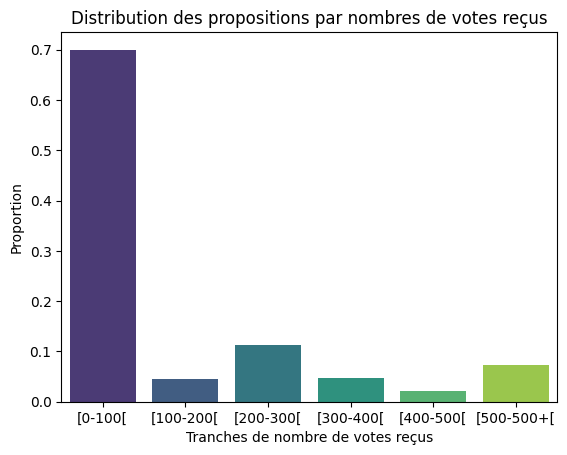

In [ ]:
# D√©finir les intervalles et les √©tiquettes
bins = [0, 100, 200, 300, 400, 500, float('inf')]  # Limites des intervalles
labels = ['[0-100[', '[100-200[', '[200-300[', '[300-400[', '[400-500[', '[500-500+[']  # Noms des cat√©gories

# Utiliser pd.cut directement dans le graphique
sns.countplot(x=pd.cut(data['Nb de votes'], bins=bins, labels=labels, include_lowest=True), palette='viridis', stat ='proportion')

# Ajouter les titres et labels
plt.title('Distribution des propositions par nombres de votes re√ßus')
plt.xlabel('Tranches de nombre de votes re√ßus')
plt.ylabel('Proportion')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_18376\2799486795.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.cut(data['Nb de votes'], bins=bins,labels=labels, include_lowest=True),palette='viridis', stat ='proportion')


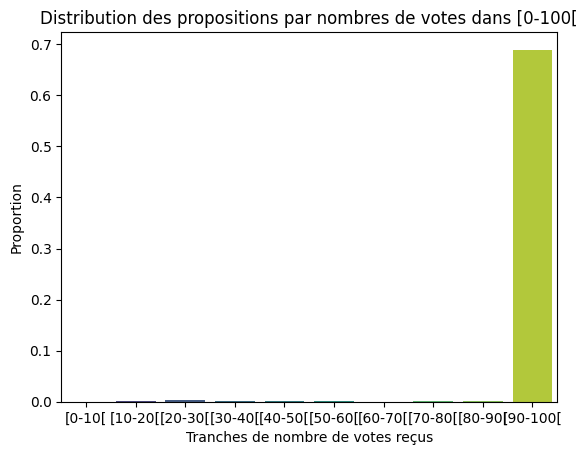

In [ ]:
# D√©finir les intervalles et les √©tiquettes
bins = [0,10,20,30,40,50,60,70,80,90,100]  # Limites des intervalles
labels = ['[0-10[','[10-20[','[20-30[','[30-40[','[40-50[','[50-60[','[60-70[','[70-80[','[80-90[','[90-100[']  # Noms des cat√©gories

# Utiliser pd.cut directement dans le graphique
#sns.countplot(x=pd.cut(data['Nb de votes'], bins=bins, labels=labels, include_lowest=True), palette='viridis', stat ='proportion')
#sns.histplot(data= data, x='Nb de votes',bins=bins, color=sns.color_palette('viridis', n_colors=10)[0], stat='proportion',cbar=True)
sns.countplot(x=pd.cut(data['Nb de votes'], bins=bins,labels=labels, include_lowest=True),palette='viridis', stat ='proportion')
#plt.xticks(ticks=np.arange(0,101,10))
# Ajouter les titres et labels
plt.title('Distribution des propositions par nombres de votes dans [0-100[')
plt.xlabel('Tranches de nombre de votes re√ßus')
plt.ylabel('Proportion')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_18376\3142412916.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.cut(data['Nb de votes'], bins=bin,labels=labels,include_lowest=False),


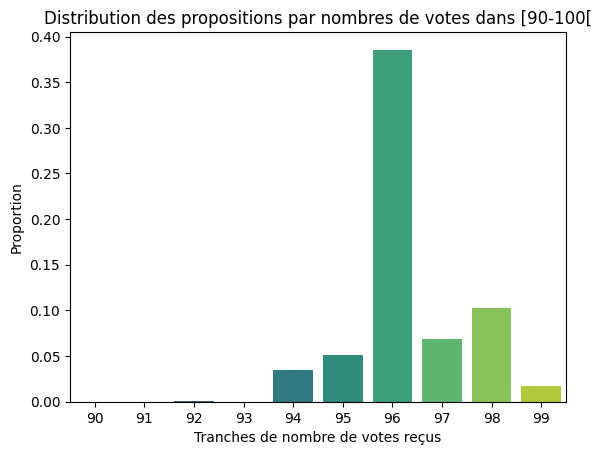

In [ ]:
# D√©finir les intervalles et les √©tiquettes
bin = [89,90,91,92,93,94,95,96,97,98,99]  # Limites des intervalles
labels = ['90','91','92','93','94','95','96','97','98','99']  # Noms des cat√©gories
#plt.xticks(ticks=np.arange(90,101,1))
# Utiliser pd.cut directement dans le graphique
#sns.countplot(x=pd.cut(data['Nb de votes'], bins=bins, labels=labels, include_lowest=True), palette='viridis', stat ='proportion')
#sns.histplot(data= data,x='Nb de votes',bins=bin, color=sns.color_palette('viridis', n_colors=10)[0], stat='proportion')
sns.countplot(x=pd.cut(data['Nb de votes'], bins=bin,labels=labels,include_lowest=False),
              palette='viridis', stat ='proportion')

# Ajouter les titres et labels
plt.title('Distribution des propositions par nombres de votes dans [90-100[')
plt.xlabel('Tranches de nombre de votes re√ßus')
plt.ylabel('Proportion')
plt.show()

In [ ]:
votes96 = (data['Nb de votes'] == 96).sum() / len(data)
print(votes96)

0.3855421686746988


* ## Analyse des votes

C:\Users\USER\AppData\Local\Temp\ipykernel_18376\2954990707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = pd.cut(data['nb_de_mots'],bins = bins, labels = labels,include_lowest = True, right=True),palette = 'viridis',stat='proportion')


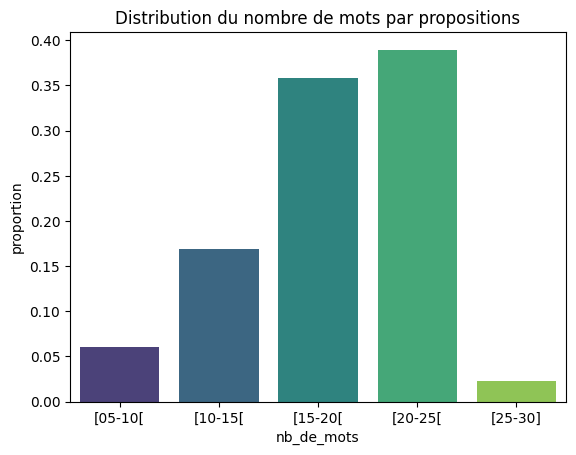

In [ ]:
bins = [5,10,15,20,25,30]  # Limites des intervalles
labels = ['[05-10[','[10-15[', '[15-20[', '[20-25[','[25-30]']

sns.countplot(x = pd.cut(data['nb_de_mots'],bins = bins, labels = labels,include_lowest = True, right=True),palette = 'viridis',stat='proportion')
plt.title('Distribution du nombre de mots par propositions')
plt.show()

* ## Distribution du nombre de vote

In [ ]:
# Fonction pour d√©terminer la cat√©gorie dominante
def get_dominant_category(row):
    if row['% pour'] > row['% contre'] and row['% pour'] > row['% neutre']:
        if row['% pour'] >0.5:
            return 'pour'
        else :
            return 'pol√©mique'
    elif row['% contre'] > row['% pour'] and row['% contre'] > row['% neutre']:
        if row['% contre'] >0.5:
            return 'contre'
        else :
            return 'pol√©mique'
    else:
        if row['% neutre'] >0.5:
            return 'neutre'
        else :
            return 'pol√©mique'

# Ajouter une nouvelle colonne
data['Cat√©gorie'] = data.apply(get_dominant_category, axis=1)

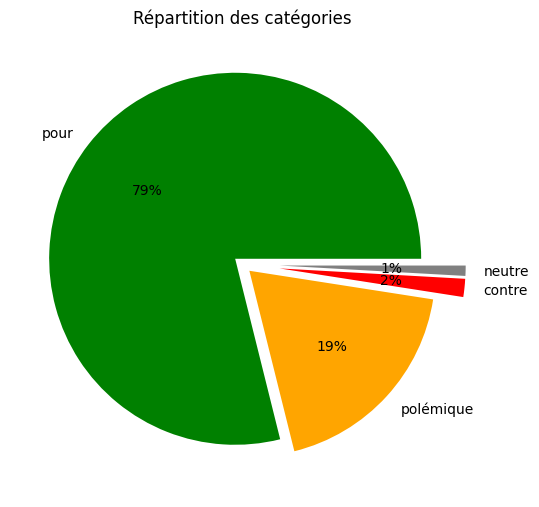

In [ ]:
import matplotlib.pyplot as plt

# Calculer les proportions pour chaque cat√©gorie
proportions = data['Cat√©gorie'].value_counts(normalize=True)  # Proportions (%)
categories = proportions.index  # Les cat√©gories
values = proportions.values  # Les proportions

# Param√®tres du graphique
explode = [0.05] * (len(categories) - 2) + [0.2, 0.2]  # S√©pare chaque tranche l√©g√®rement
labels = categories  # Labels provenant des cat√©gories
colors = ['green','orange', 'red', 'grey'][:len(categories)]  # Limiter les couleurs √† la taille des cat√©gories

# Dessiner le camembert
plt.figure(figsize=(6,12))  # Ajuster la taille
plt.pie(
    values, labels=labels, autopct="%0.0f%%", explode=explode,
    textprops={"color": '#000000'}, colors=colors
)
plt.title("R√©partition des cat√©gories")
plt.show()


* ## Distribution moyenne des types de vote

* ## Categorisation des propositions

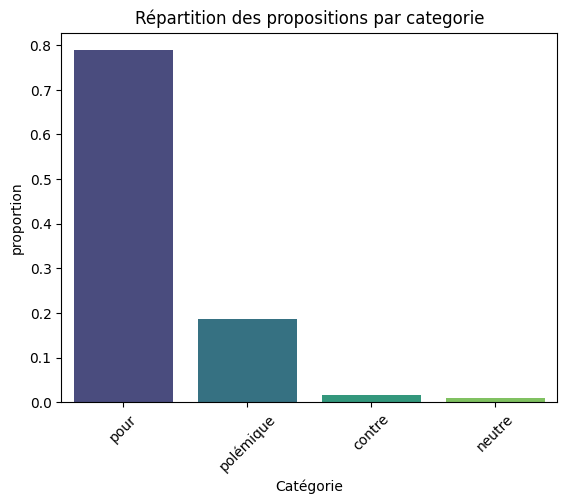

In [ ]:
sns.countplot(data=data, x='Cat√©gorie', palette='viridis', hue = "Cat√©gorie",stat="proportion")
plt.title('R√©partition des propositions par categorie')
plt.xticks(rotation=45)
plt.show()

* ## Distribution des zones d'adh√©sion

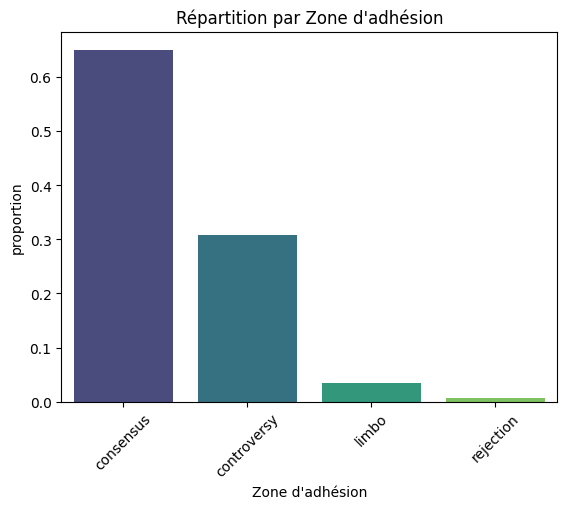

In [ ]:
sns.countplot(data=data, x='Zone d\'adh√©sion', palette='viridis', hue="Zone d\'adh√©sion",stat='proportion')
plt.title('R√©partition par Zone d\'adh√©sion')
plt.xticks(rotation=45)
plt.show()

* # Analyse des mots les plus fr√©quents dans les propositions (sans nettoyage initial).

In [ ]:
from collections import Counter

# Compter les mots 
word_counts = Counter(" ".join(data['Proposition']).split())
print(word_counts.most_common(10)) 


[('Il', 1911), ('faut', 1907), ('les', 1554), ('de', 1440), ('des', 1052), ('et', 927), ('pour', 736), ('√†', 727), ('le', 717), ('la', 688)]


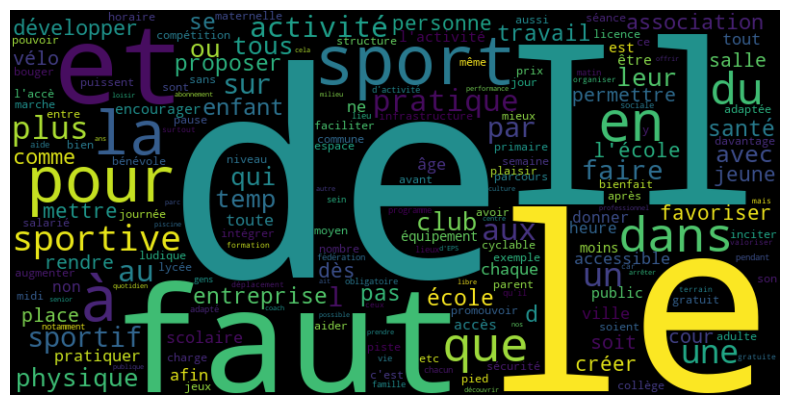

In [ ]:
# G√©n√©rer un nuage de mots √† partir des propositions pour visualiser les mots les plus fr√©quents
# On fusionne toutes les propositions en une seule cha√Æne de caract√®res
text = " ".join(data['Proposition']) #
wordcloud = WordCloud(width=800, height=400, background_color="black",
                      prefer_horizontal=1.0,collocations=False).generate(text)
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation="bilinear") # Pour afficher l'image avec une interpolation fluide
plt.axis("off") # D√©sactive les axes pour un affichage propre
plt.show()

* # Pr√©traitement des donn√©es textuelles

In [ ]:
import unicodedata

def remove_accents(text):
    # Normalise le texte en supprimant les accents
    text = unicodedata.normalize('NFKD', text)
    text = ''.join(char for char in text if not unicodedata.combining(char))
    return text


In [ ]:
import spacy
nlp = spacy.load("fr_core_news_sm") 
def preprocess_with_spacy(text):
    # Analyser le texte avec spaCy
    doc = nlp(text.lower())  # Mise en minuscule
    cleaned_tokens = []
    mots_inutils = ['faire','falloir','tous','sport','etre','sportif']
    for token in doc:
        if not token.is_stop and token.is_alpha and token.lemma_ not in mots_inutils:  # Exclure stopwords et non-alphabetiques
            cleaned_tokens.append(remove_accents(token.lemma_))  # Ajouter la forme lemmatis√©e du mot

    return " ".join(cleaned_tokens)
# Nettoyer les propositions
data['cleaned_propositions'] = data['Proposition'].apply(preprocess_with_spacy)

ModuleNotFoundError: No module named 'spacy'

In [ ]:
print(data['cleaned_propositions'])

0       sensibiliser enfant jeune age ecole maternel p...
1       commune faciliter marche ville amenager itiner...
2       ecole lien sante demontrer jeune meilleur moye...
3       rigoureux enfance etat esprit bienveillant dro...
4       permettre handicap souhaiter rencontrer struct...
                              ...                        
1904        adopter chien minimum minute marche fois jour
1905    pouvoir exclure membre federation resultat evi...
1906      reduire nombre arret bus ville obliger marche m
1907    inciter francais equiper montre connecter stim...
1908       encourager garcon inscrire club football rugby
Name: cleaned_propositions, Length: 1909, dtype: object


* ## Statistique descriptive des prpositions nettoy√©es

In [ ]:
nb_mots = [len(proposition.split()) for proposition in data["cleaned_propositions"]]

# Cr√©er un DataFrame
df = pd.Series(nb_mots)
# Afficher le r√©sultat dans un format similaire
print(df.describe())

count    1909.000000
mean        7.778418
std         2.297715
min         1.000000
25%         6.000000
50%         8.000000
75%         9.000000
max        14.000000
dtype: float64


* ## Les mots les plus frequents

In [ ]:
# Compter les mots 
word_counts = Counter(" ".join(data['cleaned_propositions']).split())
print(word_counts.most_common(20)) 

[('activite', 295), ('pratique', 241), ('ecole', 211), ('physique', 165), ('temps', 159), ('club', 156), ('proposer', 148), ('enfant', 142), ('sante', 127), ('travail', 126), ('entreprise', 122), ('developper', 113), ('favoriser', 109), ('association', 107), ('mettre', 105), ('creer', 102), ('jeune', 96), ('permettre', 96), ('pouvoir', 94), ('age', 91)]


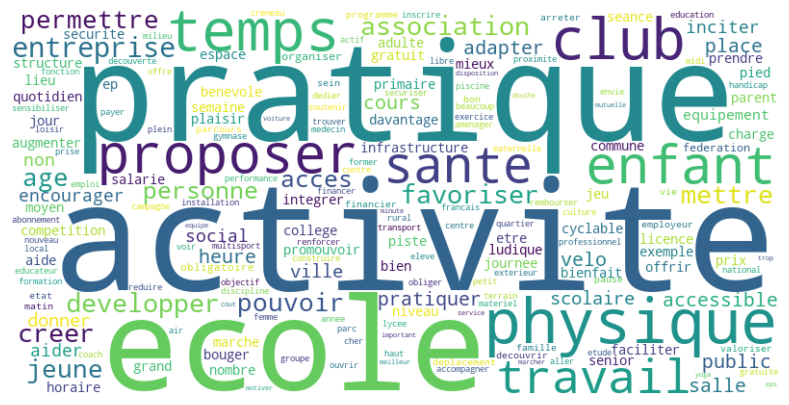

In [ ]:
text = " ".join(data['cleaned_propositions']) 
wordcloud = WordCloud(width=800, height=400, background_color="white",
                      prefer_horizontal=1.0,collocations=False,normalize_plurals=False).generate(text)
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") # D√©sactive les axes pour un affichage propre
plt.show()

* # Mod√©lisation des th√©matiques avec Word2Vec

In [ ]:
# pip install --upgrade scipy gensim
# pip install gensim

In [ ]:
from gensim.models import Word2Vec # Biblioth√®que pour entra√Æner des mod√®les Word2Vec

In [ ]:
# Tokenisation des phrases
tokenized_sentences = [text.split() for text in data['cleaned_propositions']]

# Entra√Æner le mod√®le Word2Vec
# vector_size : taille des vecteurs (100 dimensions)
# window : nombre de mots voisins consid√©r√©s
# min_count : ignorer les mots qui apparaissent moins de 2 fois
# workers : nombre de c≈ìurs utilis√©s pour le traitement
model = Word2Vec(sentences=tokenized_sentences, vector_size=300, window=17,sg=1,  min_count=1, workers=5)

# Exemples de mots similaires
print(model.wv.most_similar("club"))


[('association', 0.9994154572486877), ('accessible', 0.9993364214897156), ('cher', 0.9993264079093933), ('salle', 0.9992985725402832), ('offrir', 0.9992932677268982), ('aider', 0.9992914199829102), ('famille', 0.9992905855178833), ('inscription', 0.9992789626121521), ('creer', 0.999260663986206), ('qualite', 0.9992539286613464)]


* # Entra√Æner Skip-Gram (sg=1) ou CBOW (sg=0)

In [ ]:
# Entra√Æner Skip-Gram (sg=1) ou CBOW (sg=0)
skip_gram_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, sg=1, min_count=2)
cbow_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, sg=0, min_count=2)


* ## Optimisation des hyperparametres

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Fonction d'√©valuation bas√©e sur des paires de mots
def evaluate_model(word2vec_model, word_pairs):
    similarities = []
    for word1, word2 in word_pairs:
        if word1 in word2vec_model.wv and word2 in word2vec_model.wv:
            sim = cosine_similarity(
                [word2vec_model.wv[word1]], 
                [word2vec_model.wv[word2]]
            )[0][0]
            similarities.append(sim)
    return np.mean(similarities)


In [ ]:
from itertools import combinations
mots = ['club','association','pratique','rural','cyclabe','activite','velo','ecole','entreprise']

# G√©n√©rer toutes les paires uniques
word_pairs = list(combinations(mots, 2))



In [ ]:
from gensim.models import Word2Vec
from itertools import product

# D√©finir les plages d'hyperparam√®tres
vector_sizes = [150, 200, 250,300]
windows = [5, 10, 14,17]
sgs = [0, 1]
min_counts = [1,2, 3, 5]

# Liste pour enregistrer les scores
results = []

# Combinaisons d'hyperparam√®tres
for vector_size, window, sg, min_count in product(vector_sizes, windows, sgs, min_counts):
    model = Word2Vec(
        sentences=tokenized_sentences,
        vector_size=vector_size,
        window=window,
        sg=sg,
        min_count=min_count,
        workers=5,
        epochs=10
    )
    score = evaluate_model(model, word_pairs)
    results.append({
        'vector_size': vector_size,
        'window': window,
        'sg': sg,
        'min_count': min_count,
        'score': score
    })

# Trier les r√©sultats par score
sorted_results = sorted(results, key=lambda x: x['score'], reverse=True)
print(sorted_results[:5])  # Top 5 combinaisons


[{'vector_size': 300, 'window': 14, 'sg': 0, 'min_count': 1, 'score': 0.99982995}, {'vector_size': 300, 'window': 17, 'sg': 0, 'min_count': 1, 'score': 0.9998289}, {'vector_size': 300, 'window': 17, 'sg': 0, 'min_count': 2, 'score': 0.9998222}, {'vector_size': 300, 'window': 14, 'sg': 0, 'min_count': 2, 'score': 0.9998158}, {'vector_size': 300, 'window': 10, 'sg': 0, 'min_count': 1, 'score': 0.99981445}]


In [ ]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from skopt import gp_minimize
from skopt.space import Integer, Categorical

# D√©finir les plages d'hyperparam√®tres
search_space = [
    Integer(50, 300),        # vector_size
    Integer(2, 15),          # window
    Categorical([0, 1]),     # sg
    Integer(1, 10),          # min_count
    Integer(5, 50)           # epochs
]

# Liste pour suivre les r√©sultats
results = []

# Fonction d'objectif avec enregistrement des r√©sultats
def train_word2vec(params):
    # Extraire les hyperparam√®tres
    vector_size, window, sg, min_count, epochs = params

    # Cr√©er et entra√Æner le mod√®le Word2Vec
    model = Word2Vec(
        sentences=tokenized_sentences,
        vector_size=vector_size,
        window=window,
        sg=sg,
        min_count=min_count,
        workers=5,
        epochs=epochs
    )
    
    # √âvaluer le mod√®le
    score = -evaluate_model(model, word_pairs)  # Minimiser le score n√©gatif
    
    # Enregistrer les r√©sultats
    results.append((params, score))
    
    return score

# Optimisation bay√©sienne
result = gp_minimize(
    func=train_word2vec,
    dimensions=search_space,
    n_calls=20,
    random_state=42
)

# Trier les r√©sultats par score (croissant car on minimise)
sorted_results = sorted(results, key=lambda x: x[1])

# Afficher les 5 meilleurs param√®tres
print("Top 5 configurations :")
for i, (params, score) in enumerate(sorted_results[:5]):
    print(f"Rank {i+1}: Params={params}, Score={score}")

# Afficher les meilleurs param√®tres globaux
print("\nBest parameters (global): ", result.x)


Top 5 configurations :
Rank 1: Params=[196, 11, 0, 3, 9], Score=-0.99970543384552
Rank 2: Params=[239, 8, 0, 6, 6], Score=-0.9996546506881714
Rank 3: Params=[300, 2, 0, 1, 17], Score=-0.9991974234580994
Rank 4: Params=[245, 11, 0, 1, 17], Score=-0.9991851449012756
Rank 5: Params=[202, 13, 0, 5, 13], Score=-0.9991682767868042

Best parameters (global):  [196, 11, 0, 3, 9]


* # Analyse des th√©matiques

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [ ]:
# Tokenisation des phrases
tokenized_sentences = [text.split() for text in data['cleaned_propositions']]

# Entra√Æner le mod√®le Word2Vec
# vector_size : taille des vecteurs (100 dimensions)
# window : nombre de mots voisins consid√©r√©s
# min_count : ignorer les mots qui apparaissent moins de 2 fois
# workers : nombre de c≈ìurs utilis√©s pour le traitement
model = Word2Vec(sentences=tokenized_sentences, vector_size=300, window=17,sg=1,  min_count=2, workers=5)

# Exemples de mots similaires
print(model.wv.most_similar("velo"))


[('deplacement', 0.9991728663444519), ('pied', 0.9990364909172058), ('securiser', 0.9989540576934814), ('voiture', 0.998906135559082), ('mobilite', 0.998849630355835), ('ville', 0.9988214373588562), ('rural', 0.9987745881080627), ('marche', 0.998740017414093), ('trajet', 0.9987030029296875), ('actif', 0.9986737370491028)]


* ## Analyse des mots

In [ ]:
# R√©cup√©rer les mots et leurs vecteurs
words = list(model.wv.index_to_key)  # Tous les mots du vocabulaire
vectors = model.wv[words]  # Les vecteurs correspondants
print(words)
print(vectors)

['activite', 'pratique', 'ecole', 'physique', 'temps', 'club', 'proposer', 'enfant', 'sante', 'travail', 'entreprise', 'developper', 'favoriser', 'association', 'mettre', 'creer', 'jeune', 'permettre', 'pouvoir', 'age', 'acces', 'personne', 'pratiquer', 'velo', 'place', 'salle', 'public', 'adapter', 'cours', 'heure', 'accessible', 'ville', 'scolaire', 'donner', 'aider', 'encourager', 'non', 'social', 'inciter', 'equipement', 'lieu', 'gratuit', 'integrer', 'faciliter', 'competition', 'espace', 'etre', 'primaire', 'semaine', 'college', 'jeu', 'prendre', 'commune', 'jour', 'horaire', 'augmenter', 'bien', 'infrastructure', 'benevole', 'niveau', 'aide', 'promouvoir', 'quotidien', 'adulte', 'pied', 'davantage', 'offrir', 'seance', 'journee', 'cyclable', 'ludique', 'salarie', 'structure', 'mieux', 'parent', 'securite', 'prix', 'ep', 'senior', 'grand', 'moyen', 'nombre', 'plaisir', 'bienfait', 'bouger', 'charge', 'exemple', 'licence', 'piste', 'federation', 'obligatoire', 'organiser', 'financi

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(vectors)

# R√©duction des vecteurs √† 50 dimensions avec t-SNE
# R√©duction de dimension √† 50 avec PCA
pca = PCA(n_components=50, random_state=42)
vectors_pca_50 = pca.fit_transform(vectors_normalized)

# R√©duction des vecteurs √† 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
word_vectors_2d = tsne.fit_transform(vectors_pca_50)

# Appliquer le clustering K-Means
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(vectors_pca_50)

# Pr√©parer les donn√©es pour le graphique
df = pd.DataFrame(vectors_pca_50, columns=['Dim1', 'Dim2'])
df['word'] = words  # Ajouter les mots correspondants
df['cluster'] = clusters  # Ajouter les labels des clusters

# Afficher un aper√ßu des donn√©es
print(df.head())


ValueError: Shape of passed values is (2633, 50), indices imply (2633, 2)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd
import plotly.express as px

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(vectors)

# R√©duction de dimension √† 50 avec PCA
pca = PCA(n_components=50, random_state=42)
vectors_pca_50 = pca.fit_transform(vectors_normalized)

# R√©duction des vecteurs √† 2 dimensions avec t-SNE
# tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
# word_vectors_2d = tsne.fit_transform(vectors_pca_50)
# Appliquer le clustering K-Means
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(vectors_pca_50)

# Pr√©parer les donn√©es pour le graphique
dim = []
for i in range(1,51):
    dim.append("Dim"+str(i))
df = pd.DataFrame(vectors_pca_50, columns=dim)  # Dimensions r√©duites avec t-SNE
df['word'] = words  # Ajouter les mots correspondants
df['cluster'] = clusters  # Ajouter les labels des clusters
# Cr√©er le graphique interactif
fig = px.scatter(
    df,
    x='Dim1',
    y='Dim2',
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='word',  # Afficher le mot lors du survol
    title="Projection des vecteurs de mots (t-SNE avec Clustering K-Means)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2'},
    color_continuous_scale='hsv',  # Choisir une palette de couleurs
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},  # Assurez-vous que les clusters sont dans un ordre compr√©hensible
    width=1000,
    height=600
)

# Personnaliser les points
fig.update_traces(marker=dict(size=10, opacity=0.9, line=dict(width=1.5, color='white')))

# Ajouter un titre pour la l√©gende des clusters
fig.update_layout(
    legend_title="Clusters",
    title_x=0.5,  # Centrer le titre
)

# Afficher le graphique
fig.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd
import plotly.express as px

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(vectors)

# R√©duction des vecteurs √† 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=10, n_iter=1000)
word_vectors_2d = tsne.fit_transform(vectors_normalized)

# Appliquer le clustering K-Means
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(word_vectors_2d)

# Pr√©parer les donn√©es pour le graphique
df = pd.DataFrame(word_vectors_2d, columns=['Dim1', 'Dim2'])  # Dimensions r√©duites avec t-SNE
df['word'] = words  # Ajouter les mots correspondants
df['cluster'] = clusters  # Ajouter les labels des clusters

# Cr√©er le graphique interactif
fig = px.scatter(
    df,
    x='Dim1',
    y='Dim2',
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='word',  # Afficher le mot lors du survol
    title="Projection des vecteurs de mots (t-SNE avec Clustering K-Means)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2'},
    color_continuous_scale='hsv',  # Choisir une palette de couleurs
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},  # Assurez-vous que les clusters sont dans un ordre compr√©hensible
    width=1000,
    height=600
)

# Personnaliser les points
fig.update_traces(marker=dict(size=10, opacity=0.9, line=dict(width=1.5, color='white')))

# Ajouter un titre pour la l√©gende des clusters
fig.update_layout(
    legend_title="Clusters",
    title_x=0.5,  # Centrer le titre
)

# Afficher le graphique
fig.show()


* ## Analyse des propositions

In [ ]:
# Fonction pour calculer le vecteur moyen d'une proposition

def get_mean_vector(sentence, model):
    words = sentence.split()  # Tokenisation simple
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if word_vectors:  # Si des mots de la proposition sont dans le mod√®le
        return np.mean(word_vectors, axis=0)
    else:  # Si aucun mot de la proposition n'est dans le mod√®le
        return np.zeros(model.vector_size)


In [ ]:
# Calculer un vecteur moyen pour chaque proposition

data['mean_vector'] = data.apply(
    lambda row: get_mean_vector(row['cleaned_propositions'], model),
    axis=1
)
print(data['mean_vector'])


0       [0.007742384, 0.16001976, -0.019371722, 0.0336...
1       [0.0076336386, 0.15125528, -0.019653384, 0.030...
2       [0.008451276, 0.15532517, -0.018816838, 0.0321...
3       [0.0056837546, 0.1417472, -0.018287208, 0.0309...
4       [0.008491076, 0.139459, -0.018259764, 0.027908...
                              ...                        
1904    [0.007324142, 0.15365405, -0.019932931, 0.0323...
1905    [0.0054511647, 0.14189716, -0.017425943, 0.029...
1906    [0.006125483, 0.14966592, -0.018576588, 0.0301...
1907    [0.007452739, 0.14521289, -0.019601807, 0.0303...
1908    [0.0075701936, 0.120964564, -0.015276077, 0.02...
Name: mean_vector, Length: 1909, dtype: object


In [ ]:
# Convertir les vecteurs en liste pour compatibilit√© avec kmeans
proposition_vectors = np.vstack(data['mean_vector'].values)
len(proposition_vectors)

1909

In [ ]:
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt  # Pour obtenir la palette 'tab10'

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(proposition_vectors)

# R√©duction de dimension √† 50 avec PCA
pca = PCA(n_components=50, random_state=42)
vectors_pca_50 = pca.fit_transform(vectors_normalized)

# R√©duction des vecteurs √† 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
word_vectors_2d = tsne.fit_transform(vectors_pca_50)

# Appliquer le clustering K-Means
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster = kmeans.fit_predict(vectors_pca_50)
data['cluster'] = cluster

# Pr√©parer les donn√©es pour le graphique
dim = []
for i in range(1,51):
    dim.append("Dim"+str(i))
df1 = pd.DataFrame(vectors_pca_50, columns=dim)
df1['propositions'] = data['Proposition']
df1['cluster'] = cluster
df1['vote'] = data['Cat√©gorie']
df1['proposition_vectors'] = data['mean_vector']

# Cr√©er le graphique interactif avec Plotly
fig = px.scatter(
    df1,
    x='Dim1',
    y='Dim2',
    symbol='vote',  # Utiliser la colonne 'vote' pour les symboles
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='propositions',  # Afficher les propositions lors du survol
    title="Projection des propositions (t-SNE avec Clustering K-Means)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2', 'vote': 'Avis des citoyens'},
    color_discrete_sequence='hsv',  # Utiliser la palette tab10 comme s√©quence discr√®te
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},
    width=1000,
    height=600
)

# Personnaliser les points : ajouter des bordures
fig.update_traces(marker=dict(
    size=12,  # Taille des points
    opacity=0.8,  # Transparence
    line=dict(width=1, color='white')  # Bordure noire avec une √©paisseur de 2
))

# Ajouter un titre pour la l√©gende des clusters
fig.update_layout(
    legend_title="Clusters",
    title_x=0.3,  # Centrer le titre
    margin=dict(l=40, r=40, t=40, b=40)
)

# Afficher le graphique
fig.show()


In [ ]:
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt  # Pour obtenir la palette 'tab10'

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(proposition_vectors)

# R√©duction de dimension √† 50 avec PCA
pca = PCA(n_components=50, random_state=42)
vectors_pca_50 = pca.fit_transform(vectors_normalized)

# R√©duction des vecteurs √† 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
word_vectors_2d = tsne.fit_transform(vectors_pca_50)

# Appliquer le clustering K-Means
n_clusters = 15
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster = kmeans.fit_predict(word_vectors_2d)
data['cluster'] = cluster

# Pr√©parer les donn√©es pour le graphique
dim = []
for i in range(1,51):
    dim.append("Dim"+str(i))
df1 = pd.DataFrame(word_vectors_2d, columns=('Dim1','Dim2'))
df1['propositions'] = data['Proposition']
df1['cluster'] = cluster
df1['vote'] = data['Cat√©gorie']
df1['proposition_vectors'] = data['mean_vector']

# Cr√©er le graphique interactif avec Plotly
fig = px.scatter(
    df1,
    x='Dim1',
    y='Dim2',
    symbol='vote',  # Utiliser la colonne 'vote' pour les symboles
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='propositions',  # Afficher les propositions lors du survol
    title="Projection des propositions (t-SNE avec Clustering K-Means)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2', 'vote': 'Avis des citoyens'},
    color_discrete_sequence='hsv',  # Utiliser la palette tab10 comme s√©quence discr√®te
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},
    width=1000,
    height=600
)

# Personnaliser les points : ajouter des bordures
fig.update_traces(marker=dict(
    size=12,  # Taille des points
    opacity=0.8,  # Transparence
    line=dict(width=1, color='white')  # Bordure noire avec une √©paisseur de 2
))

# Ajouter un titre pour la l√©gende des clusters
fig.update_layout(
    legend_title="Clusters",
    title_x=0.3,  # Centrer le titre
    margin=dict(l=40, r=40, t=40, b=40)
)

# Afficher le graphique
fig.show()


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcul de la similarit√© entre les centro√Ødes des clusters
cos_sim_clusters = cosine_similarity(kmeans.cluster_centers_)

# Affichage des similarit√©s entre clusters
print("Matrice de similarit√© cosinus entre clusters :")
print(cos_sim_clusters)


Matrice de similarit√© cosinus entre clusters :
[[ 0.99999976 -0.94051653 -0.36885467 -0.9389966   0.871273   -0.9817996
  -0.9455661   0.9082577   0.79863954 -0.9382685   0.8890361   0.91798675
   0.9765751  -0.94426054  0.2086323 ]
 [-0.94051653  1.0000001   0.61855906  0.99949175 -0.97983825  0.98285294
   0.9984303  -0.99420387 -0.95107734  0.9993712  -0.855912   -0.9660645
  -0.95804125  0.9993592  -0.34729233]
 [-0.36885467  0.61855906  1.0000002   0.61857015 -0.71595323  0.49813277
   0.59914523 -0.6742423  -0.76284283  0.6240898  -0.5137407  -0.54702055
  -0.375639    0.6094224  -0.7192319 ]
 [-0.9389966   0.99949175  0.61857015  1.         -0.98068845  0.9824792
   0.99866015 -0.9946943  -0.9527949   0.9992704  -0.8556705  -0.96446574
  -0.95691687  0.99919426 -0.34861854]
 [ 0.871273   -0.97983825 -0.71595323 -0.98068845  1.         -0.93905526
  -0.97873306  0.9939536   0.97216856 -0.98031336  0.8270255   0.91162103
   0.8947839  -0.97715384  0.38731402]
 [-0.9817996   0.982

In [ ]:
#  Calcul de la matrice de similarit√© cosinus entre clusters
cluster_centers = kmeans.cluster_centers_
similarity_matrix = cosine_similarity(cluster_centers)

# Affichage des r√©sultats
print("Matrice de similarit√© cosinus entre clusters :")
print(similarity_matrix)

# Fusion des clusters similaires (si similarity > 0.9)
threshold = 0.9
merged_clusters = {}
for i in range(n_clusters):
    merged_clusters[i] = [i]  # Initialiser chaque cluster avec lui-m√™me
    for j in range(n_clusters):
        if i != j and similarity_matrix[i, j] > threshold:
            merged_clusters[i].append(j)

print("\nClusters fusionn√©s :")
print(merged_clusters)

Matrice de similarit√© cosinus entre clusters :
[[ 0.99999976 -0.94051653 -0.36885467 -0.9389966   0.871273   -0.9817996
  -0.9455661   0.9082577   0.79863954 -0.9382685   0.8890361   0.91798675
   0.9765751  -0.94426054  0.2086323 ]
 [-0.94051653  1.0000001   0.61855906  0.99949175 -0.97983825  0.98285294
   0.9984303  -0.99420387 -0.95107734  0.9993712  -0.855912   -0.9660645
  -0.95804125  0.9993592  -0.34729233]
 [-0.36885467  0.61855906  1.0000002   0.61857015 -0.71595323  0.49813277
   0.59914523 -0.6742423  -0.76284283  0.6240898  -0.5137407  -0.54702055
  -0.375639    0.6094224  -0.7192319 ]
 [-0.9389966   0.99949175  0.61857015  1.         -0.98068845  0.9824792
   0.99866015 -0.9946943  -0.9527949   0.9992704  -0.8556705  -0.96446574
  -0.95691687  0.99919426 -0.34861854]
 [ 0.871273   -0.97983825 -0.71595323 -0.98068845  1.         -0.93905526
  -0.97873306  0.9939536   0.97216856 -0.98031336  0.8270255   0.91162103
   0.8947839  -0.97715384  0.38731402]
 [-0.9817996   0.982

In [ ]:
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt  # Pour obtenir la palette 'tab10'

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(proposition_vectors)

# R√©duction de dimension √† 50 avec PCA
# pca = PCA(n_components=50, random_state=42)
# vectors_pca_50 = pca.fit_transform(vectors_normalized)

# R√©duction des vecteurs √† 2 dimensions avec t-SNE
# tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
# word_vectors_2d = tsne.fit_transform(vectors_pca_50)

# Appliquer le clustering K-Means
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster = kmeans.fit_predict(vectors_normalized)
data['cluster'] = cluster

# Pr√©parer les donn√©es pour le graphique
dim = []
for i in range(1,301):
    dim.append("Dim"+str(i))
df1 = pd.DataFrame(vectors_normalized, columns=dim)
df1['propositions'] = data['Proposition']
df1['cluster'] = cluster
df1['vote'] = data['Cat√©gorie']
df1['proposition_vectors'] = data['mean_vector']

# Cr√©er le graphique interactif avec Plotly
fig = px.scatter(
    df1,
    x='Dim1',
    y='Dim2',
    symbol='vote',  # Utiliser la colonne 'vote' pour les symboles
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='propositions',  # Afficher les propositions lors du survol
    title="Projection des propositions (t-SNE avec Clustering K-Means)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2', 'vote': 'Avis des citoyens'},
    color_discrete_sequence='hsv',  # Utiliser la palette tab10 comme s√©quence discr√®te
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},
    width=1000,
    height=600
)

# Personnaliser les points : ajouter des bordures
fig.update_traces(marker=dict(
    size=12,  # Taille des points
    opacity=0.8,  # Transparence
    line=dict(width=1, color='white')  # Bordure noire avec une √©paisseur de 2
))

# Ajouter un titre pour la l√©gende des clusters
fig.update_layout(
    legend_title="Clusters",
    title_x=0.3,  # Centrer le titre
    margin=dict(l=40, r=40, t=40, b=40)
)

# Afficher le graphique
fig.show()
